# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import random
from random import gauss

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#the following gives access to utils folder
#where utils package stores shared code
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(
                  os.getcwd(),
                  os.pardir)
)

#only add it once
if (PROJECT_ROOT not in sys.path):
    sys.path.append(PROJECT_ROOT)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

## Constants and Functions
Migrate these to a separate package when done so they can be used with scripts

In [2]:
NUMB_SAMPLES = 100
RAND_MAX_VAL =10
RAND_MIN_VAL =0
MAX_RISE = 20

def gendata(ns):
    '''
    generate dataset for linear regression
    :return: x,y dataset
    '''
    x = [val for val in range(ns)]
    y=[random.random()*(RAND_MAX_VAL-RAND_MIN_VAL)+RAND_MIN_VAL + val + MAX_RISE + RAND_MAX_VAL*gauss(0,1) for val in range(ns)]
    x=np.array(x).reshape(-1,1)
    y=np.array(y).reshape(-1,1)
    return(x,y)


## Generate data

In [3]:
x,y = gendata(NUMB_SAMPLES)
# ax = sns.scatterplot(x=x, y=y)

In [4]:
#split into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

### Scale Data (is this necessary when there is just 1 independant variable?)
<mark>Anyway here is a list of tandard Scaler methods, pay attention to fit and transform
![title](./standardscaler_methods.png)

In [5]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
scaler_Xtrain = preprocessing.StandardScaler().fit(X_train)
scaler_ytrain = preprocessing.StandardScaler().fit(y_train)
X_train=scaler_Xtrain.transform(X_train)
y_train=scaler_ytrain.transform(y_train)
X_test=scaler_Xtrain.transform(X_test)
y_test=scaler_ytrain.transform(y_test)

## Fit Data, the scikitlearn way

### Fit the model

In [6]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X=X_train, y=y_train);

In [7]:
# reg.coef_
# reg.intercept_

#plot linear regression line
#something is wrong with these points, especially reg.coef_
# pts=np.array([[0,reg.intercept_],[NUMB_SAMPLES, NUMB_SAMPLES*reg.coef_[0]]])
# ax=sns.lineplot(x=pts[:,0], y=pts[:,1],color='yellow',linewidth=3 )

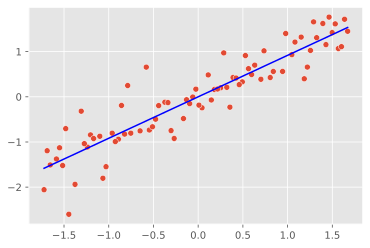

In [8]:
#plot points and linear regression line
ax=sns.scatterplot(x=X_train.squeeze(), y=y_train.squeeze())
ax=sns.lineplot(x=X_train.squeeze(), y=reg.predict(X_train).squeeze(),color='blue' )

### Predict on new data

In [9]:
#predict on new data
y_pred = reg.predict(X_test)
# y_pred

### Calculate metrics

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

#mean squared error?
print("Mean squared error for test: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean squared error for train: %.2f" % mean_squared_error(y_train, reg.predict(X_train)))

Mean squared error for test: 0.13
Mean squared error for train: 0.16


### Plot it all

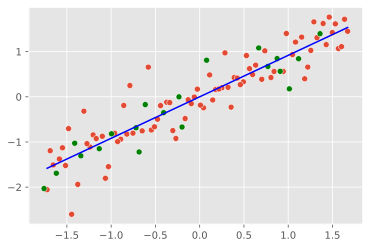

In [11]:
#plot points and linear regression line
ax=sns.scatterplot(x=X_train.squeeze(), y=y_train.squeeze())
ax=sns.scatterplot(x=X_test.squeeze(), y=y_test.squeeze(), color='green')
ax=sns.lineplot(x=X_train.squeeze(), y=reg.predict(X_train).squeeze(),color='blue' )

## Inverse transform, undo the standard scaler

In [12]:
scaler_ytrain.inverse_transform(y_pred)[:5]

array([[109.01559493],
       [ 78.33910861],
       [ 95.72245086],
       [ 70.15871225],
       [ 69.13616271]])